# データを確認する

In [90]:
import pandas as pd
import numpy as np

df = pd.read_csv('./syakousei.csv')

## データを確認する

In [95]:
df.head(5)

,id,外向性,社交性,積極性,知性,信頼性,素直さ
0,1,3,4,4,5,4,4
1,2,6,6,7,8,7,7
2,3,6,5,7,5,5,6
3,4,6,7,5,4,6,5
4,5,5,7,6,5,5,5


## 統計量を確認する

In [96]:
df.describe()

,id,外向性,社交性,積極性,知性,信頼性,素直さ
count,20.00000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,5.200000,5.35000,5.300000,5.000000,5.200000,5.100000
std,5.91608,0.894427,1.03999,1.260743,1.213954,0.894427,0.967906
min,1.00000,3.000000,3.00000,3.000000,3.000000,4.000000,3.000000
25%,5.75000,5.000000,5.00000,4.000000,4.000000,5.000000,4.750000
50%,10.50000,5.000000,5.50000,5.500000,5.000000,5.000000,5.000000
75%,15.25000,6.000000,6.00000,6.000000,5.250000,6.000000,6.000000
max,20.00000,6.000000,7.00000,7.000000,8.000000,7.000000,7.000000


# 相関係数

In [99]:
df_data = df.drop('id', axis=1)

In [100]:
df_data.corr()

,外向性,社交性,積極性,知性,信頼性,素直さ
外向性,1.000000,0.486598,0.597427,0.242365,0.276316,0.218862
社交性,0.486598,1.000000,0.557963,0.125065,0.316855,0.172543
積極性,0.597427,0.557963,1.000000,0.240722,0.037339,0.146644
知性,0.242365,0.125065,0.240722,1.000000,0.436256,0.627103
信頼性,0.276316,0.316855,0.037339,0.436256,1.000000,0.583632
素直さ,0.218862,0.172543,0.146644,0.627103,0.583632,1.000000


上記の結果より

外向性と相関が高いのは　積極性,  社交性<br>
社交性と相関が高いのは　積極性,  外向性<br>
積極性と相関が高いのは 外向性,  社交性<br>
知性と相関が高いのは   　素直さ, 信頼性<br>
信頼性と相関が高いのは　素直さ, 知性<br>
素直さと相関が高いのは  知性, 信頼性<br>

より、２つの因子に分けられそうなのがわかります。

1.  外向性,  社交性 積極性
2.  知性, 信頼性, 素直さ

# スクリープロット

Text(0, 0.5, 'eigenvalue')

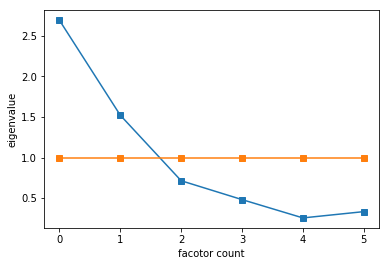

In [124]:
#　固有値1以上の因子数を探すので、スクリープロット用のダミーデータを作成する
eigenvalue_one : np.ndarray = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.linalg.eigvals(df_data.corr()), 's-')
plt.plot(eigenvalue_one, 's-')
plt.xlabel('facotor count')
plt.ylabel('eigenvalue')

上記より因子数2は妥当と言える

# プロマックス法

プロマックス法でデータを回転させます

In [145]:
from factor_analyzer import FactorAnalyzer

In [146]:
columns = df_data.columns
n = 2

In [147]:
fa = FactorAnalyzer(n_factors=n, rotation='promax', impute='drop')
fa.fit(df_data)
fa.loadings_

array([[ 0.07417775,  0.70194627],
       [ 0.0326453 ,  0.66278311],
       [-0.11286124,  0.86765339],
       [ 0.66045235,  0.04153972],
       [ 0.65254046,  0.03089357],
       [ 0.93560566, -0.093399  ]])

In [148]:
# csvで出力
pd.DataFrame(fa.loadings_, index=columns).to_csv('./result.csv')

# データの確認

In [141]:
df_result = pd.read_csv('./result.csv')

In [142]:
df_result

,Unnamed: 0,0,1
0,外向性,0.074178,0.701946
1,社交性,0.032645,0.662783
2,積極性,-0.112861,0.867653
3,知性,0.660452,0.041540
4,信頼性,0.652540,0.030894
5,素直さ,0.935606,-0.093399


わかりにくいので色をつけます。

In [149]:
import seaborn as sns

In [150]:
cm = sns.light_palette("red", as_cmap=True)
df_result.style.background_gradient(cmap=cm)

,Unnamed: 0,0,1
0,外向性,0.0741778,0.701946
1,社交性,0.0326453,0.662783
2,積極性,-0.112861,0.867653
3,知性,0.660452,0.0415397
4,信頼性,0.65254,0.0308936
5,素直さ,0.935606,-0.093399


綺麗に別れましたね。

0番目の因子['知性', '信頼性', '素直さ']　を将来有望童貞因子
1番目の因子['外向性', '社交性', '積極性']　を将来リア充やりチン因子

と言う名称をつけましょう。